In [52]:
'''
This contains code for generating the following figures
    - "Evaluation of FACETs explanation analytics using COREX, our counterfactual region explanation index." 
    - "Evaluation of query response time with and without COREX, FACETs bit-vector based counterfactual region explanation index. Varying Nr, the number of indexed counterfactual regions.

Experiment results files needed: VaryNrects, VaryM

Results used in the paper are provided in "../results/final" if generating new results run each experiment and update the results paths below
'''
# path to each result file
index_results_path = '../results/vary_nrects_index.csv' #"../results/final/vary_nrects_index.csv"
linear_results_path = '../results/vary_nrects_linear.csv' #"../results/final/vary_nrects_linear.csv"
m_path = "../results/vary_m.csv" # "../results/final/vary_m.csv"

# path to output the figure
export_figures = True
output_dir = "./" #"./final/"
fig_save_name_1 = "index_evaluation_line"
fig_save_name_2 = "index_evaluation_bar"
fig_type = ".pdf"

In [53]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import axis

sys.path.append(os.path.abspath("../"))
#from dataset import DS_NAMES
#from utilities.figure_tools import (get_latest_results_directory, load_results,
                                    #make_fig_directory)

plot_fontsize = 20
if export_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir)


In [54]:
index_results = pd.read_csv(index_results_path).groupby(["dataset", "explainer", "n_rects"]).mean().reset_index()
print("datasets", list(index_results["dataset"].unique()))
index_results.head(100)

datasets ['adult', 'cancer', 'compas', 'credit', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_rects,n_trees,max_depth,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_manhattan,avg_length,prep_time,explain_time,sample_time,n_explain
0,adult,FACETIndex,100,100.0,NaN,4.5,0.844577,0.712720,0.622166,0.664303,1.0,1.329772,2.513224,5.580,24.137535,0.118079,0.005904,20.0
1,adult,FACETIndex,1000,100.0,NaN,4.5,0.844577,0.712720,0.622166,0.664303,1.0,0.636592,1.036556,3.970,25.201818,0.670317,0.033516,20.0
2,adult,FACETIndex,5000,100.0,NaN,4.5,0.844577,0.712720,0.622166,0.664303,1.0,0.351938,0.550985,3.290,30.348649,2.005754,0.100288,20.0
3,adult,FACETIndex,10000,100.0,NaN,4.5,0.844577,0.712720,0.622166,0.664303,1.0,0.272384,0.428564,3.130,36.614077,3.243547,0.162177,20.0
4,adult,FACETIndex,20000,100.0,NaN,4.5,0.844577,0.712720,0.622166,0.664303,1.0,0.213398,0.321638,2.875,49.411026,5.414979,0.270749,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vertebral,FACETIndex,20000,100.0,NaN,4.5,0.843548,0.854648,0.923544,0.885745,1.0,0.092708,NaN,3.925,22.960470,0.096741,0.004837,20.0
96,vertebral,FACETIndex,30000,100.0,NaN,4.9,0.853226,0.872426,0.920335,0.894620,1.0,0.089201,NaN,3.770,34.267582,0.134762,0.006738,20.0
97,vertebral,FACETIndex,40000,100.0,NaN,4.5,0.843548,0.854648,0.923544,0.885745,1.0,0.086508,NaN,3.730,45.283303,0.155631,0.007782,20.0
98,vertebral,FACETIndex,50000,100.0,NaN,4.5,0.843548,0.854648,0.923544,0.885745,1.0,0.086473,NaN,3.835,56.410878,0.219243,0.010962,20.0


In [55]:
linear_results = pd.read_csv(linear_results_path).groupby(["dataset", "explainer", "n_rects"]).mean().reset_index()
print("datasets", list(linear_results["dataset"].unique()))
linear_results.head()

datasets ['adult', 'cancer', 'compas', 'credit', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_rects,n_trees,max_depth,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_manhattan,avg_length,prep_time,explain_time,sample_time,n_explain
0,adult,FACETIndex,100,100.0,NaN,4.5,0.844577,0.71272,0.622166,0.664303,1.0,1.329772,2.513224,5.580,25.125481,0.111960,0.005598,20.0
1,adult,FACETIndex,1000,100.0,NaN,4.5,0.844577,0.71272,0.622166,0.664303,1.0,0.636592,1.036556,3.970,26.380588,0.989124,0.049456,20.0
2,adult,FACETIndex,5000,100.0,NaN,4.5,0.844577,0.71272,0.622166,0.664303,1.0,0.351938,0.550985,3.290,30.796048,4.905244,0.245262,20.0
3,adult,FACETIndex,10000,100.0,NaN,4.5,0.844577,0.71272,0.622166,0.664303,1.0,0.272384,0.428564,3.130,36.258259,9.741142,0.487057,20.0
4,adult,FACETIndex,20000,100.0,NaN,4.5,0.844577,0.71272,0.622166,0.664303,1.0,0.213398,0.321638,2.875,47.088649,19.364771,0.968239,20.0


In [56]:
# load m results
m_results = pd.read_csv(m_path)
m_results.groupby(["dataset", "explainer", "facet_m"]).mean().reset_index()
print("datasets", list(linear_results["dataset"].unique()))
m_results.head()

datasets ['adult', 'cancer', 'compas', 'credit', 'glass', 'magic', 'spambase', 'vertebral']


,Unnamed: 0,explainer,dataset,iteration,facet_m,index_time,sample_time,sample_time/m=4
0,NaN,facet,adult,NaN,2.0,0.647513,0.714362,1.643204
1,NaN,facet,adult,NaN,3.0,0.945202,0.559128,1.286128
2,NaN,facet,adult,NaN,4.0,1.251927,0.434738,1.000000
3,NaN,facet,adult,NaN,5.0,1.545158,0.377983,0.869450
4,NaN,facet,adult,NaN,6.0,1.847549,0.359740,0.827487


In [57]:
dataset1 = "adult"
dataset2 = "cancer"
dataset3 = "credit"
dataset4 = "magic"
dataset5 = "spambase"

# dataset1 = "compas"
# dataset2 = "glass"
# dataset3 = "vertebral"

cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    dataset1: colors[0],
    dataset2: colors[1],
    dataset3: colors[2],
    dataset4: colors[3],
    dataset5: colors[4]
}
ds_markers = {
    dataset1: "^",
    dataset2: "o",
    dataset3: "v",
    dataset4: "s",
    dataset5: "D"
}
marker_size = 10
line_width = 4
marker_sizes = {
    dataset1: marker_size,
    dataset2: marker_size,
    dataset3: marker_size,
    dataset4: marker_size,
    dataset5: marker_size
}
nrects_pretty = {
    0: "0",
    100: "0.1",
    1000: "1",
    5000: "5",
    10000: "10",
    20000: "20",
    30000: "30",
    40000: "40",
    50000: "50",
    60000: "60",
    70000: "70",
    80000: "80",
    90000: "90",
    100000: "100",
}

In [58]:
# drop rows we don't want for clarity
nrects_keep = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
index_keep = index_results["n_rects"].isin(nrects_keep)
index_results = index_results[index_keep]
linear_keep = linear_results["n_rects"].isin(nrects_keep)
linear_results = linear_results[linear_keep]

In [59]:
results_dict = {
    "n_rects": index_results,
    "facet_m": m_results
}

def render_plot_ax(xfeats, yfeats, xlabels=None, ylabels=None, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False, yticks_multi=None, yrange_multi=None, ytick_format="{:.2f}", titles=None):
    #datasets = results_dict[xfeats[0]]["dataset"].unique()
    datasets = [dataset1, dataset2, dataset3, dataset4, dataset5]
    #datasets = [dataset1, dataset2, dataset3]
    fig = plt.figure(figsize=[32, 4])
    ax = fig.subplots(nrows=1, ncols=5)
    
    for i in range(len(yfeats)):
        xfeature = xfeats[i]
        yfeature =  yfeats[i]
        for ds in datasets:
            is_ds = results_dict[xfeature]["dataset"] == ds
            matching_rows = is_ds

            xvals = results_dict[xfeature][matching_rows][xfeature]
            if xfeature == "n_rects":
                xvals = [nrects_pretty[_] for _ in xvals]

            ax[i].plot(xvals, results_dict[xfeature][matching_rows][yfeature], label=yfeature, marker=ds_markers[ds], lw=line_width, ms=marker_size)
            
            ax[i].tick_params(axis='both', which='major', labelsize=plot_fontsize)
            if xfeature == "n_rects":
                ax[i].set_xticks(xvals)
                xtick_labels = [str(_) for _ in xvals]
                ax[i].set_xticklabels(xtick_labels, fontdict={"horizontalalignment": "center"}, rotation=90)
            if titles is not None:
                ax[i].set_title("({:s}) {:s}".format(chr(ord('a')+i), titles[i]), fontdict={"fontsize": plot_fontsize}) 
            if ylabels is not None:
                ax[i].set_ylabel(ylabels[i], fontdict={"fontsize": plot_fontsize})
            if xlabels is not None:
                ax[i].set_xlabel(xlabels[i], fontdict={"fontsize": plot_fontsize})
            ax[i].set_xlim(xrange)
            if yticks_multi is not None:
                ax[i].set_yticks(yticks_multi[i])
                ax[i].set_yticklabels([ytick_format.format(_) for _ in yticks_multi[i]])
            if yrange_multi is not None:
                bottom = yrange_multi[i][0]
                top = yrange_multi[i][1]
                if bottom is not None:
                    ax[i].set_ylim(bottom=bottom)
                if top is not None:
                    ax[i].set_ylim(top=top)

    lines, labels = ax[0].get_legend_handles_labels()
    fig.subplots_adjust(wspace=0.18)
    legend_labels = [datasets[_].upper() for _ in range(len(datasets))]
    fig.legend(lines, legend_labels, loc="upper center", bbox_to_anchor=(0.51, 1.14), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size": plot_fontsize}, ncol=len(legend_labels))
    if save_name is not None:
        fig.savefig(output_dir + save_name + fig_type, bbox_inches="tight", facecolor='w')

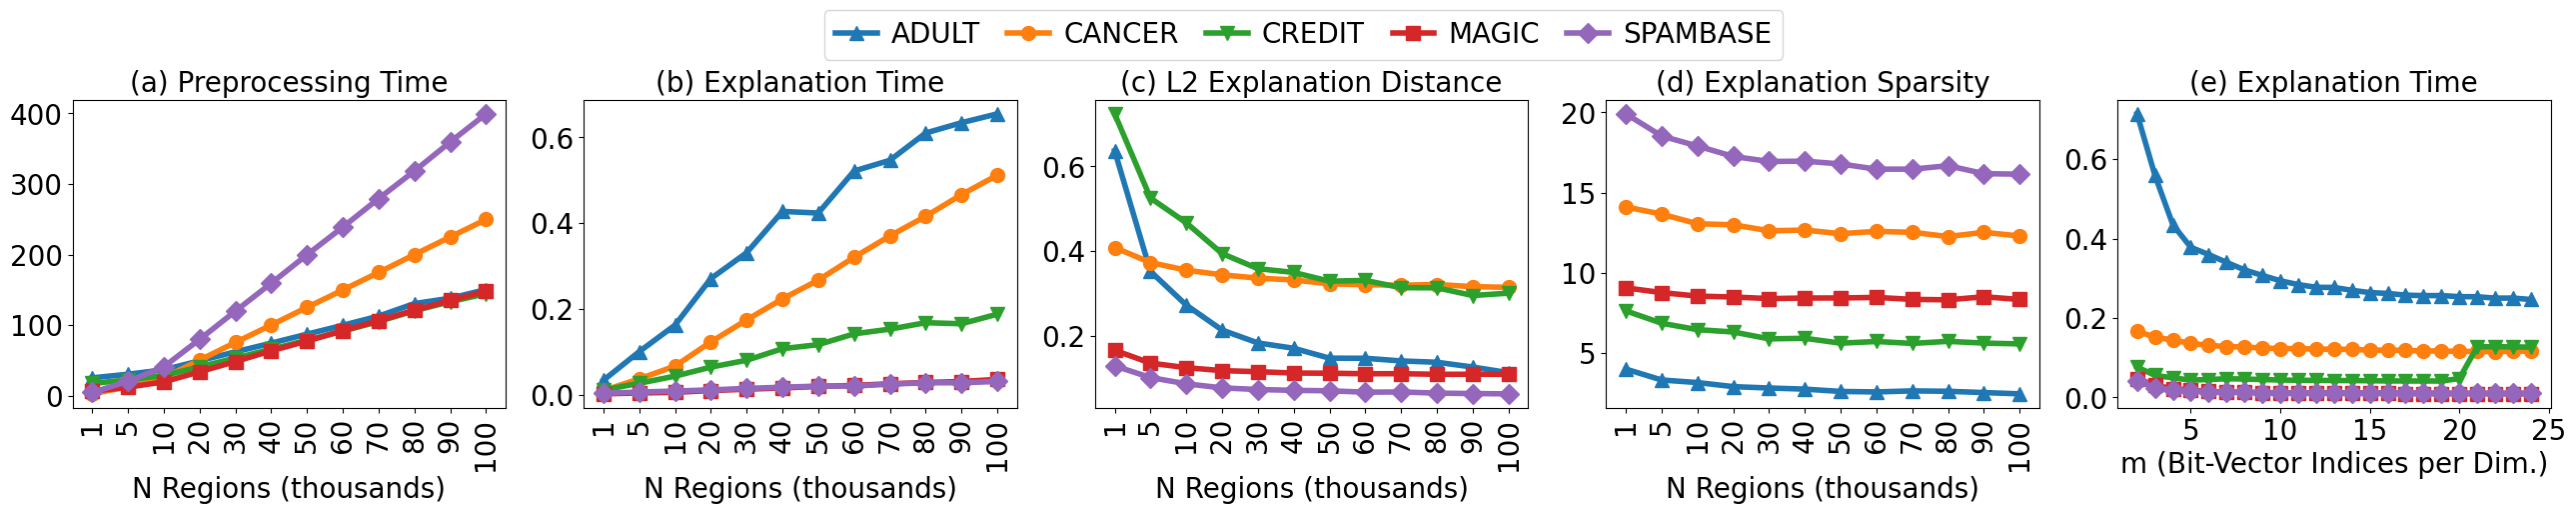

In [60]:
ylabels = ["Preprocessing Time", "Explanation Time", "L2 Explanation Distance", "Explanation Sparsity", "Explanation Time"]
xlabels = ["N Regions (thousands)", "N Regions (thousands)", "N Regions (thousands)", "N Regions (thousands)", "m (Bit-Vector Indices per Dim.)"]
titles = ["Preproc Time vs N Regions", "Expl Time vs N Regions", "Expl Time vs N Regions", "Expl Sparsity vs N Regions", "Expl Timve vs m"]
xfeats = ["n_rects", "n_rects", "n_rects", "n_rects", "facet_m"]
yfeats = ["prep_time", "sample_time", "avg_dist", "avg_length", "sample_time"]
render_plot_ax(xfeats=xfeats, yfeats=yfeats, ylabels=None, xlabels=xlabels, titles=ylabels, save_name=fig_save_name_1)

In [61]:
def render_bar_ax(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False, yticks_multi=None, yrange_multi=None, ytick_format="{:.2f}"):
    #datasets = index_results["dataset"].unique()
    datasets = [dataset1, dataset2, dataset3, dataset4, dataset5]
    #datasets = [dataset1, dataset2, dataset3]
    print(datasets)
    #fig = plt.figure(figsize=[20, 3.8])
    fig = plt.figure(figsize=[32, 3.8])
    ax = fig.subplots(nrows=1, ncols=5, sharex="all") #nrows=1, ncols=5, sharex="all")
    #ax = fig.subplots(nrows=1, ncols=3, sharex="all")
    fig.subplots_adjust(left=0.2)
       
    for i in range(len(datasets)):
        ds = datasets[i]
                
        index_match = (index_results["dataset"] == ds) & (index_results["explainer"] == "FACETIndex")
        linear_match = (linear_results["dataset"] == ds) & (linear_results["explainer"] == "FACETIndex")
        data1 = index_results[index_match][yfeature]
        data2 = linear_results[linear_match][yfeature]
        width =0.3
        ax[i].bar(np.arange(len(data1)), data1, width=width, )
        ax[i].bar(np.arange(len(data2))+ width, data2, width=width)
        
        xticks = [_ + width/2 for _ in range(len(linear_results[linear_match]["n_rects"]))]
        ax[i].set_xticks(xticks,)
        xtick_labels = [nrects_pretty[_] for _ in linear_results[linear_match]["n_rects"]]
        ax[i].set_xticklabels(xtick_labels, rotation=90, fontdict={"horizontalalignment": "center"})        
        ax[i].tick_params(axis='both', which='major', labelsize=plot_fontsize)
        
        ax[i].set_title("({:s}) {:s}".format(chr(ord('a')+i), datasets[i].upper()), fontdict={"fontsize": plot_fontsize}) 
        if xrange is not None:
            ax[i].set_xlim(xrange)
        if yticks_multi is not None:
            ax[i].set_yticks(yticks_multi[i])
            ax[i].set_yticklabels([ytick_format.format(_) for _ in yticks_multi[i]])
        if yrange_multi is not None:
            bottom = yrange_multi[i][0]
            top = yrange_multi[i][1]
            if bottom is not None:
                ax[i].set_ylim(bottom=bottom)
            if top is not None:
                ax[i].set_ylim(top=top)

    ax[0].set_ylabel(ylabel, fontsize=plot_fontsize)
    
    fig.subplots_adjust(wspace=0.22)
    legend_labels = ["FACET COREX", "FACET Linear Scan"]
    fig.legend(labels=legend_labels, loc="upper center", handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size": plot_fontsize}, bbox_to_anchor=(0.55, 1.15), ncol=len(legend_labels))
    if save_name is not None:
        fig.savefig(output_dir + save_name + fig_type, bbox_inches="tight", facecolor='w')

['adult', 'cancer', 'credit', 'magic', 'spambase']


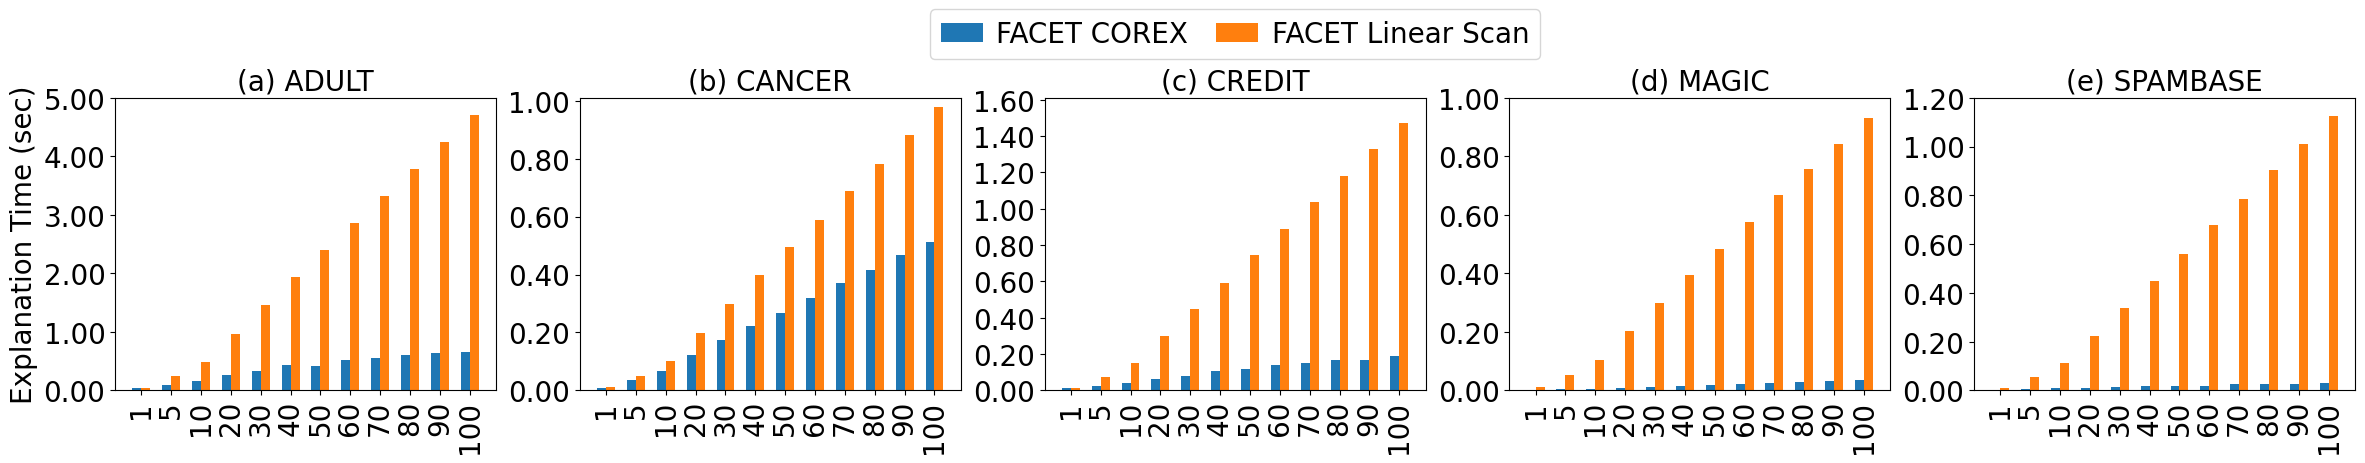

In [62]:
yticks_multi = [np.arange(0.0, 5.5, 1), np.arange(0.0, 1.02, 0.2), np.arange(0.0, 1.8, 0.2),
                np.arange(0, 1.3, 0.2), np.arange(0.0, 1.5, 0.2)]
yrange_multi = [[0.0, 5.0001], [0.0, 1.01], [0.0, 1.61], [0.0, 1], [0.0, 1.2]]
render_bar_ax(xfeature="n_rects", yfeature="sample_time", xlabel="N Regions (thousands)", ylabel="Explanation Time (sec)", title="Explanation Time vs NRegions", save_name=fig_save_name_2, yrange_multi=yrange_multi, yticks_multi=yticks_multi)

In [63]:
# The following is to create the individual vary M chart and convert the output from FACET into final vary_m csv
# import os
# import re
# import sys

# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from matplotlib import axis

In [64]:
# # read in data
# # df = pd.read_csv("../results/final/varying_m.csv")
# df = pd.read_csv("../results/final/vary_mrerun.csv")
# df.head()

In [65]:
# # Group by m, dataset taking the average across each iteration
# df_grouped = df.groupby(["dataset", "facet_m"], as_index=False).mean() 

# df_grouped["explainer"] = "facet"


# can_time = df_grouped[(df_grouped['facet_m'] == 4) & (df_grouped['dataset'] == "cancer")]["sample_time"]
# #glass_time = df_grouped[(df_grouped['facet_m'] == 4) & (df_grouped['dataset'] == "glass")]["sample_time"]
# #mag_time = df_grouped[(df_grouped['facet_m'] == 4) & (df_grouped['dataset'] == "magic")]["sample_time"]
# #spam_time = df_grouped[(df_grouped['facet_m'] == 4) & (df_grouped['dataset'] == "spambase")]["sample_time"]
# #vert_time = df_grouped[(df_grouped['facet_m'] == 4) & (df_grouped['dataset'] == "vertebral")]["sample_time"]
# adult_time = df_grouped[(df_grouped['facet_m'] == 4) & (df_grouped['dataset'] == "adult")]["sample_time"]
# compustat_time = df_grouped[(df_grouped['facet_m'] == 4) & (df_grouped['dataset'] == "compas")]["sample_time"]
# credit_time = df_grouped[(df_grouped['facet_m'] == 4) & (df_grouped['dataset'] == "credit")]["sample_time"]



# df_grouped["sample_time/m=4"] = df_grouped["sample_time"] * 0 

# df_grouped.loc[df_grouped['dataset'] == "cancer", "sample_time/m=4"] = df_grouped[(df_grouped['dataset'] == "cancer")]["sample_time"] / float(can_time)
# # df_grouped.loc[df_grouped['dataset'] == "glass", "sample_time/m=4"] = df_grouped[(df_grouped['dataset'] == "glass")]["sample_time"] / float(glass_time)
# # df_grouped.loc[df_grouped['dataset'] == "magic", "sample_time/m=4"] = df_grouped[(df_grouped['dataset'] == "magic")]["sample_time"] / float(mag_time)
# # df_grouped.loc[df_grouped['dataset'] == "spambase", "sample_time/m=4"] = df_grouped[(df_grouped['dataset'] == "spambase")]["sample_time"] / float(spam_time)
# # df_grouped.loc[df_grouped['dataset'] == "vertebral", "sample_time/m=4"] = df_grouped[(df_grouped['dataset'] == "vertebral")]["sample_time"] / float(vert_time)
# df_grouped.loc[df_grouped['dataset'] == "adult", "sample_time/m=4"] = df_grouped[(df_grouped['dataset'] == "adult")]["sample_time"] / float(adult_time)
# df_grouped.loc[df_grouped['dataset'] == "compas", "sample_time/m=4"] = df_grouped[(df_grouped['dataset'] == "compas")]["sample_time"] / float(compustat_time)
# df_grouped.loc[df_grouped['dataset'] == "credit", "sample_time/m=4"] = df_grouped[(df_grouped['dataset'] == "credit")]["sample_time"] / float(credit_time)


# print(df_grouped.shape)
# tmp_df = df_grouped[df_grouped['facet_m'] < 26] 

# # cutoff spambase and cancer at M = 12
# cutoff = 25
# df_cancer = tmp_df[(tmp_df['facet_m'] < cutoff) & (tmp_df['dataset'] == "cancer")] 
# # df_glass = tmp_df[(tmp_df['dataset'] == "glass")] 
# # df_magic = tmp_df[(tmp_df['dataset'] == "magic")] 

# # df_spam = tmp_df[(tmp_df['facet_m'] < cutoff) & (tmp_df['dataset'] == "spambase")]
# # df_vert = tmp_df[(tmp_df['dataset'] == "vertebral")] 

# #df_final = df_cancer.append(df_glass)
# # df_final = df_final.append(df_magic)
# # df_final = df_final.append(df_spam)
# # df_final = df_final.append(df_vert)

# df_adult = tmp_df[(tmp_df['dataset'] == "adult")]
# df_compas = tmp_df[(tmp_df['dataset'] == "compas")]
# df_credit = tmp_df[(tmp_df['dataset'] == "credit")]

# df_final = df_adult.append(df_adult)
# df_final = df_final.append(df_compas)
# df_final = df_final.append(df_credit)



# df_final[["explainer", "dataset", "facet_m", "index_time", "sample_time", "sample_time/m=4"]]

# df_final = df_final.sort_values(by=['facet_m'])

# # output to csv
# df_final[["explainer", "dataset", "facet_m", "index_time", "sample_time", "sample_time/m=4"]].to_csv("../results/vary_m_new2.csv", index=False)

In [66]:
# # create viz
# fig = plt.figure(figsize=[10, 4.8], frameon=True)
# ax = fig.add_subplot(1, 1, 1)
# results = df_final
# xfeature = "facet_m"
# yfeature = "sample_time"
# line_width = 4
# cmap = plt.get_cmap("tab10")
# colors = cmap.colors
# ds_colors = {
#     "adult": colors[0],
#     "compas": colors[1],
#     "credit": colors[2]#,
#     #"spambase": colors[3],
#     #"vertebral": colors[4]
# }
# ds_markers = {
#     "adult": "^",
#     "compas": "o",
#     "credit": "v"#,
#     #"spambase": "s",
#     #"vertebral": "D"
# }
# marker_size = 12
# line_width = 4
# marker_sizes = {
#     "adult": marker_size,
#     "compas": marker_size,
#     "credit": marker_size#,
#     #"spambase": marker_size,
#     #"vertebral": marker_size
# }
# title = None
# xlabel = "m (Bit-Vector Indices per Dim.)"
# ylabel = "Expl. Time (sec)"
# lhorz = True
# loc = "upper center"
# xrange = None
# yrange = None
# ylog = False
# xlog = False

# for ds in results["dataset"].unique():
#         is_ds = results["dataset"] == ds
#         for expl in results["explainer"].unique():
#             is_expl = results["explainer"] == expl
#             matching_rows = is_ds & is_expl
#             print(ds)
#             ax.plot(results[matching_rows][xfeature], results[matching_rows][yfeature], label=ds, lw=line_width, marker=ds_markers[ds], ms=marker_sizes[ds], color=ds_colors[ds])

#         # title and axis labels
#         if title is not None:
#             plt.title(title)
#         plt.xlabel(xlabel,fontsize=30)
#         plt.ylabel(ylabel,fontsize=30)
#         # legend
#         if lhorz:
#             plt.legend(loc=loc, ncol=len(results["dataset"].unique()), bbox_to_anchor=(0, 1.22, 0.82, 0), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size":20})
#         else:
#             plt.legend(loc=loc)
#         # x and y ranges
#         if xrange is not None:
#             plt.xlim(xrange)
#         if yrange is not None:
#             plt.ylim(yrange)
#         # x and y scales
#         if ylog:
#             plt.yscale('log')
#         if xlog:
#             plt.xscale('log')
#         plt.subplots_adjust(top=1.0)
#         plt.xticks(fontsize=20)
#         plt.yticks(fontsize=20)

# plt.savefig("vary_m.pdf", bbox_inches="tight")